In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import datetime

In [2]:
data = np.genfromtxt("../로그 데이터/SEG_SGEMM_result.txt", delimiter="\n", dtype=np.int64).copy()
data

array([ 3196231680, 93292771632, 93293300344, ..., 92658792872,
       92658792864, 92654987192], dtype=int64)

In [60]:
value_range = [data.min() + np.ptp(data) / 10 * i for i in range(11)]
value_range

[-1.0,
 9544533123.1,
 19089066247.2,
 28633599371.300003,
 38178132495.4,
 47722665619.5,
 57267198743.600006,
 66811731867.700005,
 76356264991.8,
 85900798115.90001,
 95445331240.0]

In [4]:
value_range_counts = 0
for i in range(10):
    index = np.where(np.logical_and(data>=value_range[i], data<=value_range[i+1]))
    value_range_counts += len(index[0])
    print("{} : {}".format(i, len(index[0])))
value_range_counts, data.shape

0 : 695
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 1737
8 : 237
9 : 234527


(237196, (237196,))

In [5]:
data_cut = data[np.where(data>=value_range[9])]
data_cut.shape

(234527,)

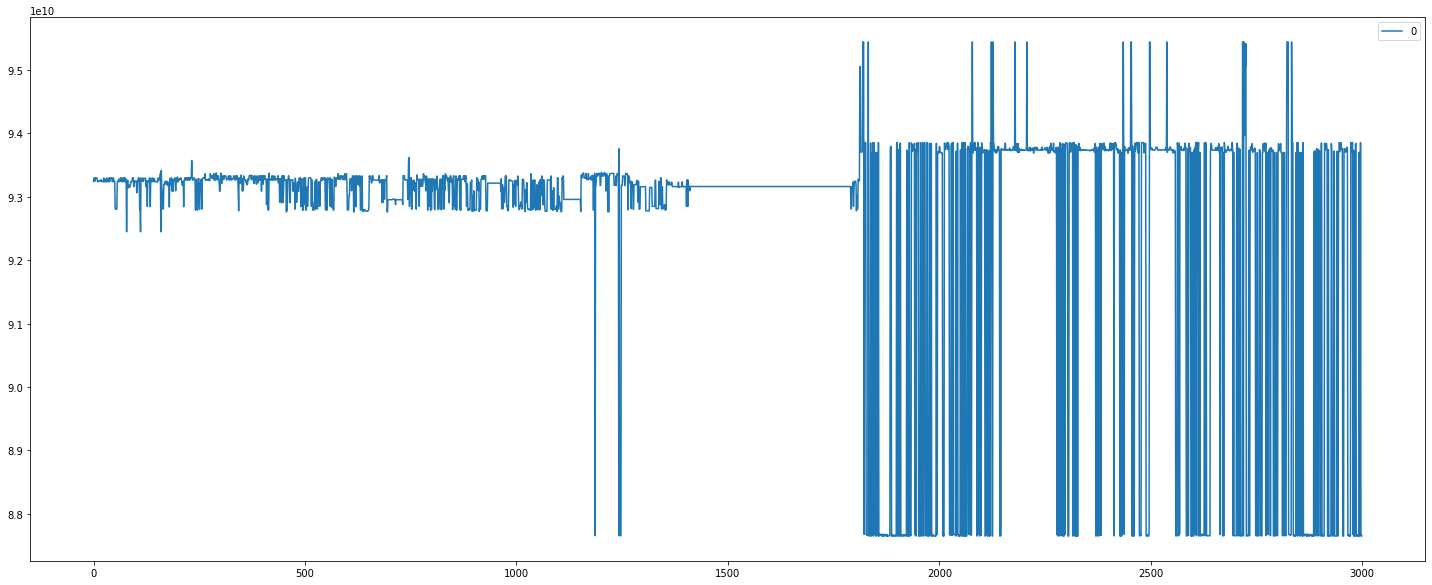

In [17]:
pd.DataFrame(data=data_cut[28000:31000]).plot(figsize=(25, 10))

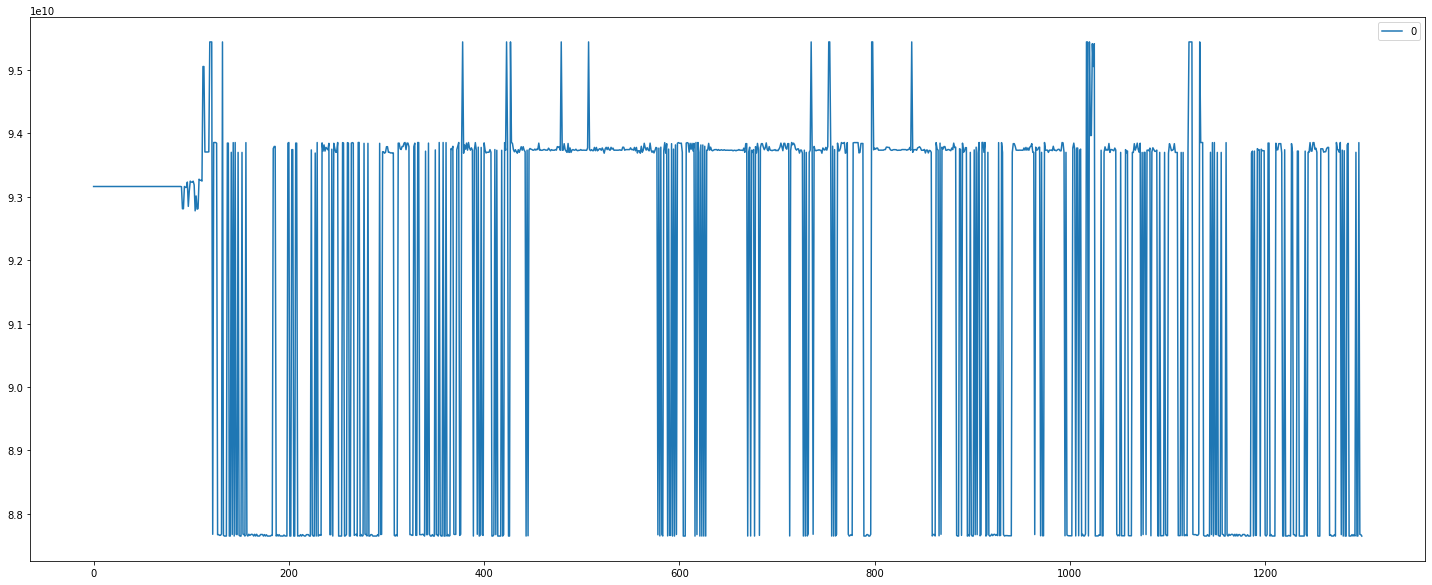

In [22]:
pd.DataFrame(data=data_cut[29700:31000]).plot(figsize=(25, 10))

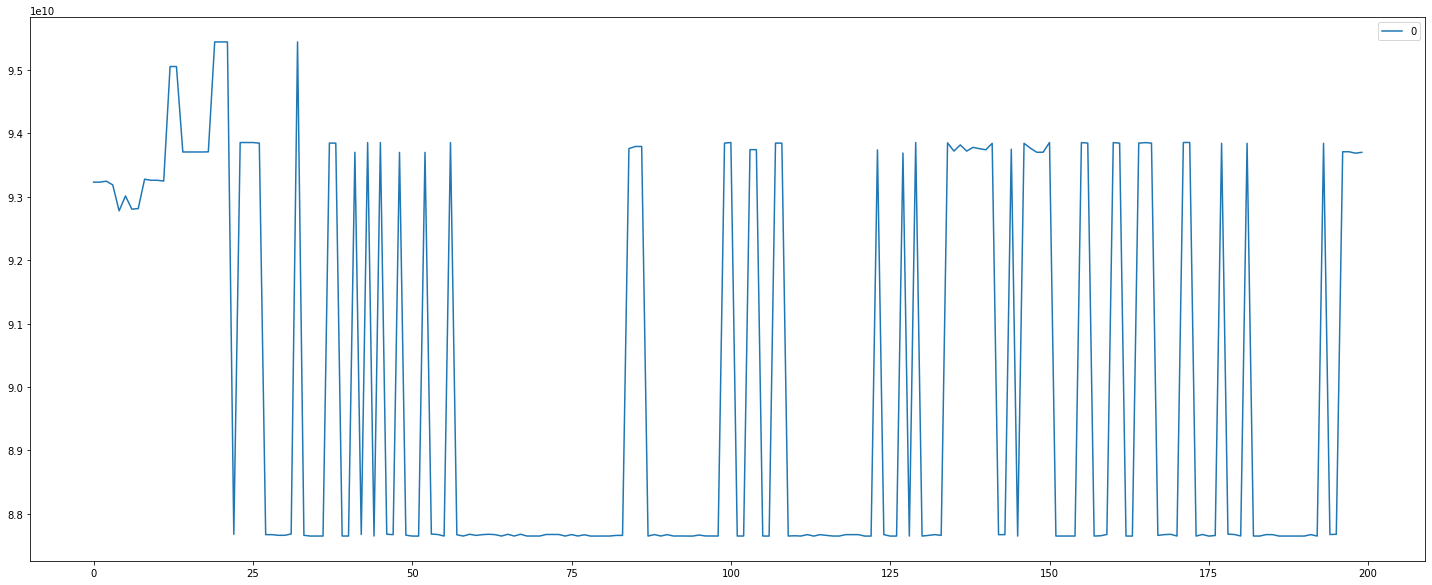

In [32]:
pd.DataFrame(data=data_cut[29800:30000]).plot(figsize=(25, 10))

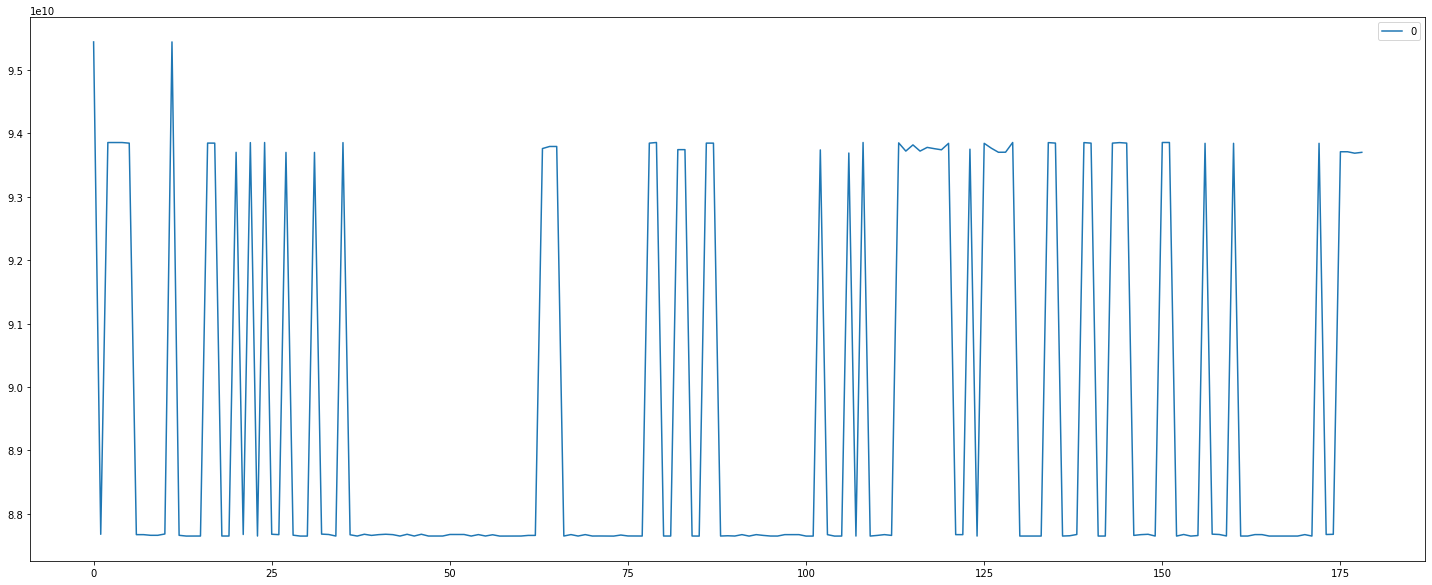

In [43]:
pd.DataFrame(data=data_cut[29821:30000]).plot(figsize=(25, 10))

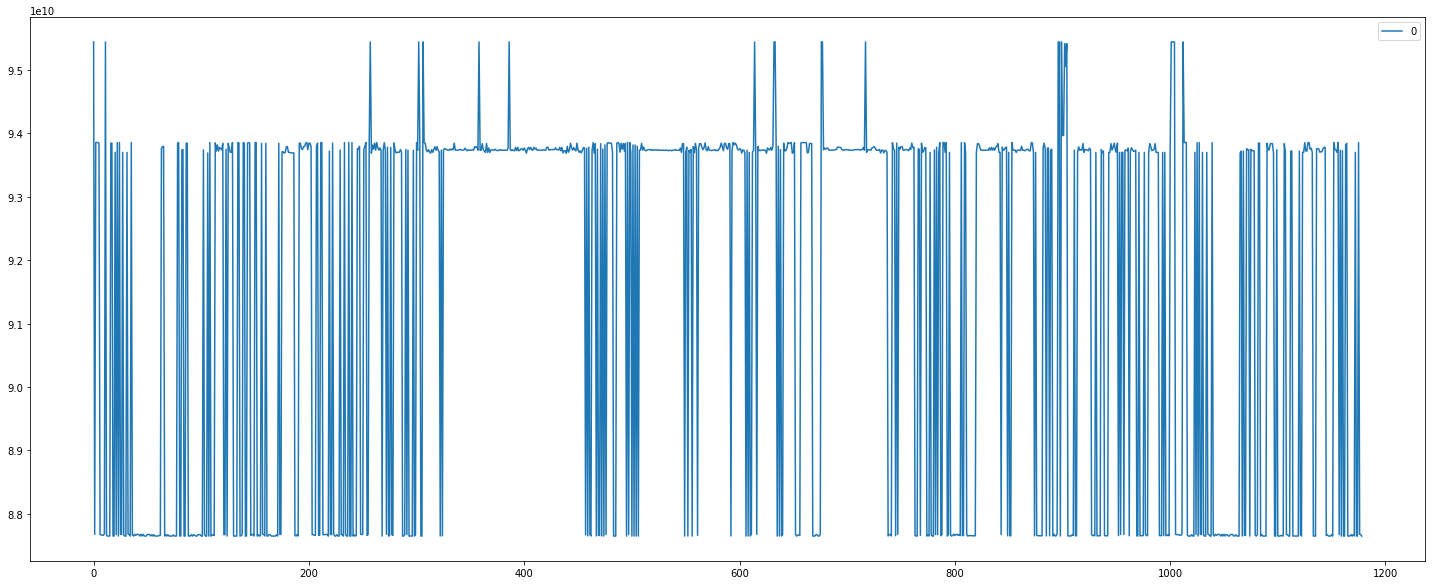

In [46]:
pd.DataFrame(data=data_cut[29821:31000]).plot(figsize=(25, 10))

In [47]:
initial_stage_index = 29821
data_remove_initial_stage = data_cut[initial_stage_index:]

In [66]:
pattern_length = 4
delta = np.array([data_remove_initial_stage[i+pattern_length] - data_remove_initial_stage[i] for i in range(int(len(data_remove_initial_stage))-pattern_length)])
delta.shape

(204702,)

In [74]:
np.savetxt("data/SEG_delta_pattern_length_{}.csv".format(pattern_length), delta)

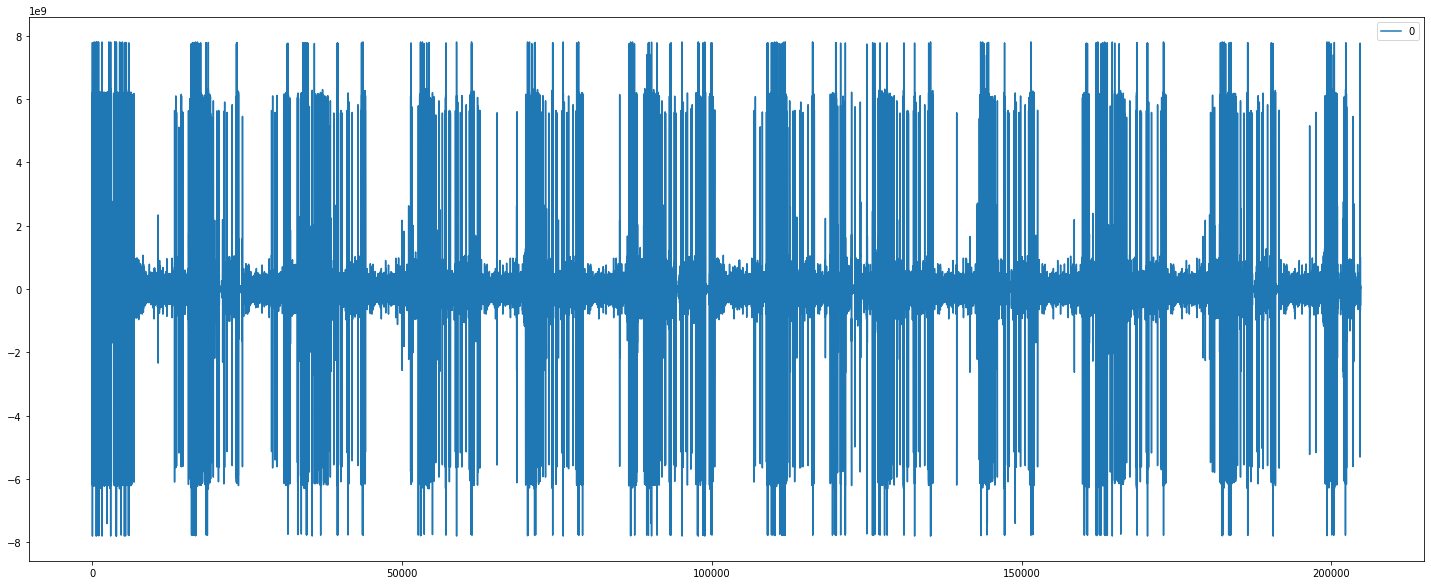

In [73]:
pd.DataFrame(data=delta).plot(figsize=(25, 10))